In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



# RandomForestClassifier, DecisionTreeClassifier, KNeighborsClassifier, LinearDiscriminantAnalysis, GaussianNB,SVC

In [2]:
protein_df = pd.read_csv('../data/raw/ProteinAndPathologyQuantifications.csv')
Donor_df = pd.read_csv('../data/raw/DonorInformation.csv')
Stains_df = pd.read_csv('../data/raw/DescriptionOfStains.csv')


In [3]:
pd.set_option('display.max_colwidth', None)

Stains_df

,api_class_name,internal_name,description,treatment_id,full_name,gene_id,method,display_name,long_display_name
0,ApiTbiDonorMetric,ihc_a_beta,Percentage of area covered by Aβ immunreactivity on fresh frozen tissue (25μm); identifies both Aβ40 and Aβ42.,300239718.0,Beta-amyloid immunohistochemistry (fresh frozen tissue): areal density,NaN,IHC: Fresh Frozen,Aβ(fresh),Aβ IHC density (fresh)
1,TbiNonquantifiedImageStains,h_e_lfb_ffpe,Hematoxylin identifies cell nuclei; Eosin stains cytoplasm and some cytoplasmic inclusions; Luxol Fast Blue stains myelin in tissue (5 μm).,471133394.0,Hematoxylin and eosin-Luxol Fast Blue stains,NaN,"Formalin Fixed, Paraffin Embedded",H&E-LFB(FFPE),H&E-LFB stain (FFPE)
2,ApiTbiDonorMetric,ihc_a_syn,Percentage of area covered by α-synuclein immunreactivity on fresh frozen tissue (25μm); identifies Lewy bodies and Lewy neurites.,300239725.0,Alpha-synuclein immunohistochemistry (fresh frozen tissue): areal density,NaN,IHC: Fresh Frozen,α-syn(fresh),α-syn IHC density (fresh)
3,ApiTbiDonorDetail,root_specimen_external_name,UW autopsy number,NaN,Top Specimen External Name,NaN,NaN,NaN,NaN
4,ApiTbiDonorMetric,ifn_g_pg_per_mg,"A prototype pro-inflammatory cytokine, critical for innate and adaptive immunity against viral and some bacterial infection via activation of macrophages and induction of class II MHC expression.",NaN,Interferon-gamma,NaN,Luminex,IFNγ,IFNγ protein quant.
...,...,...,...,...,...,...,...,...,...
57,TbiNonquantifiedImageStains,ish_gfap,"ISH of GFAP, targeting activated astrocytes.",1.0,Glial fibrillary acidic protein (ISH),2654.0,ISH,GFAP,GFAP
58,ApiTbiDonorDetail,braak,Staging of neurofibrillary tangles (NFTs) from 0 (none) to 6 (extensive neocortical NFTs) based on Braak method of staging.,NaN,Braak stage,NaN,NaN,Braak stage,Braak stage
59,ApiTbiDonorMetric,tnf_a_pg_per_mg,"A pro-inflammatory cytokine, produced primarily by macrophages, regulates inflammatory response, especially in acute phase.",NaN,Tumor necrosis factor alpha,NaN,Luminex,TNFα,TNFα protein quant.
60,ApiTbiDonorDetail,hispanic,Hispanic or non-hispanic,NaN,Hispanic,NaN,NaN,Ethnicity,Ethnicity


In [4]:
Stains_df['internal_name'].unique()

array(['ihc_a_beta', 'h_e_lfb_ffpe', 'ihc_a_syn',
       'root_specimen_external_name', 'ifn_g_pg_per_mg', 'race', 'name',
       'ish_aqp4', 'ish_slc17a7', 'ever_tbi_w_loc', 'rantes_pg_per_mg',
       'ihc_tau2_ffpe', 'external_donor_name', 'isoprostane_pg_per_mg',
       'act_demented', 'bdnf_pg_per_mg', 'ptau_over_tau_ratio',
       'ish_slc6a1', 'ptau_ng_per_mg', 'ish_mobp', 'mip_1a_pg_per_mg',
       'il_4_pg_per_mg', 'pmi_hrs', 'ab42_over_ab40_ratio',
       'ihc_a_beta_ffpe', 'ab42_pg_per_mg', 'mcp_1_pg_per_mg',
       'nincds_arda_diagnosis', 'ihc_at8', 'education_years',
       'apo_e4_allele', 'nissl', 'longest_loc_duration', 'donor_id',
       'ab40_pg_per_mg', 'ihc_iba1_ffpe', 'ihc_a_syn_ffpe', 'ish_reln',
       'num_tbi_w_loc', 'dsm_iv_clinical_diagnosis',
       'ab40_over_ab42_ratio', 'control_set', 'il_1b_pg_per_mg',
       'ihc_ptdp_43_ffpe', 'sex', 'cerad', 'il_7_pg_per_mg',
       'il_6_pg_per_mg', 'ihc_at8_ffpe', 'tau_ng_per_mg', 'nia_reagan',
       'a_syn_pg_per_

In [5]:
protein_df

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,2.68,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,3.02,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.80,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,1.30,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,0.00,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,326765653,H14.09.066,10208,PCx,0.000046,0.001989,0.000533,0.000082,0.001130,0.003128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,0.00,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,0.00,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,0.02,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650


In [6]:
len(protein_df.donor_id.unique())

107

In [7]:
len(protein_df.donor_name.unique())

107

In [8]:
donor_ids = protein_df.donor_id.unique()

In [9]:
donor_ids

array([309335467, 309335480, 309335493, 326765668, 467056408, 326765677,
       326765666, 309335479, 309335497, 326765662, 326765653, 326765676,
       467056409, 326765681, 326765670, 326765683, 326765682, 309335453,
       326765672, 467056397, 326765667, 309335438, 326765658, 309335471,
       309335474, 467056407, 326765652, 309335464, 326765649, 326765657,
       309335451, 309335477, 326765673, 326765679, 326765688, 309335468,
       309335470, 326765675, 309335491, 309335476, 326765687, 309335447,
       309335444, 326765669, 309335456, 309335445, 309335482, 309335486,
       326765674, 309335469, 309335455, 309335446, 309335483, 309335459,
       309335457, 309335465, 467056406, 309335475, 309335496, 326765686,
       467056391, 309335495, 309335461, 309335488, 326765648, 326765689,
       326765650, 309335485, 326765654, 326765664, 326765680, 326765659,
       309335462, 309335463, 309335443, 309335492, 309335466, 309335441,
       326765665, 326765663, 309335454, 467056405, 

In [10]:
count_list = []
for donor in donor_ids:
    count_list.append(len(protein_df[protein_df['donor_id']==donor]))

In [11]:
#count_list

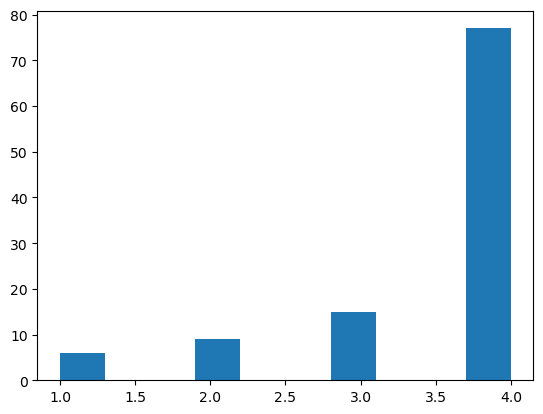

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = count_list

plt.hist(x)
plt.show() 

In [13]:
len(protein_df)

377

In [14]:
Donor_df

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,309335458,H14.09.021,88,M,N,12,18,> 1 hr,0,1,Alzheimer's Disease Type,21,Probable Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,1,1
103,309335462,H14.09.025,84,M,N,16,23,10 min - 1 hr,0,2,Alzheimer's Disease Type,40,Probable Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,0,0
104,309335454,H14.09.017,79,M,N,16,13,< 10 sec,2,3,No Dementia,44,No Dementia,Y,White,Not Hispanic,No Dementia,3,2
105,309335486,H14.09.049,95-99,M,N,21,18,3-5 min,1,1,No Dementia,12,No Dementia,Y,White,Not Hispanic,No Dementia,3,1


In [97]:
Donor_df.act_demented.unique()

array(['No Dementia', 'Dementia'], dtype=object)

In [95]:
Donor_df.dsm_iv_clinical_diagnosis.unique()

array(['No Dementia', 'Vascular', "Alzheimer's Disease Type",
       'Multiple Etiologies', 'Other or Unknown Cause', 'Other Medical'],
      dtype=object)

In [96]:
Donor_df.nincds_arda_diagnosis.unique()

array(['No Dementia', 'Dementia, Type Unknown',
       "Possible Alzheimer'S Disease", "Probable Alzheimer'S Disease"],
      dtype=object)

Text(0.5, 1.0, 'Diagnosis Counts (DSM)')

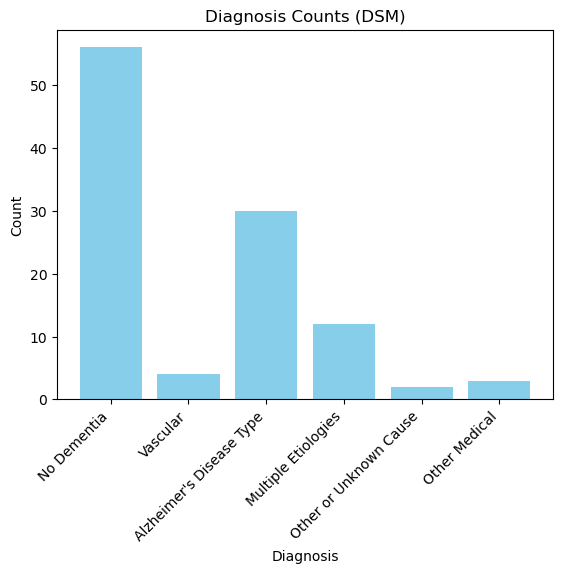

In [99]:
from collections import Counter

# Your data
data = Donor_df.dsm_iv_clinical_diagnosis

# Count occurrences of each item
counter = Counter(data)

# Extract categories and counts
categories = list(counter.keys())
counts = list(counter.values())

# Create a bar chart
plt.bar(categories, counts, color='skyblue')

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts (DSM)')

Text(0.5, 1.0, 'Diagnosis Counts (nincds)')

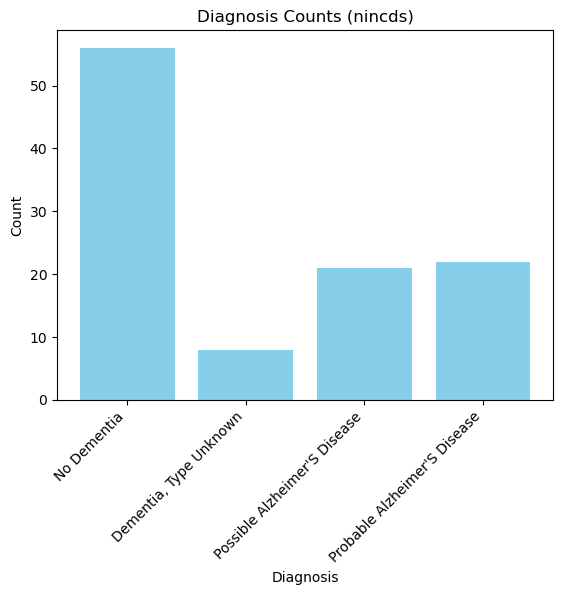

In [100]:
data = Donor_df.nincds_arda_diagnosis

# Count occurrences of each item
counter = Counter(data)

# Extract categories and counts
categories = list(counter.keys())
counts = list(counter.values())

# Create a bar chart
plt.bar(categories, counts, color='skyblue')

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts (nincds)')

Text(0.5, 1.0, 'Diagnosis Counts (Dementia)')

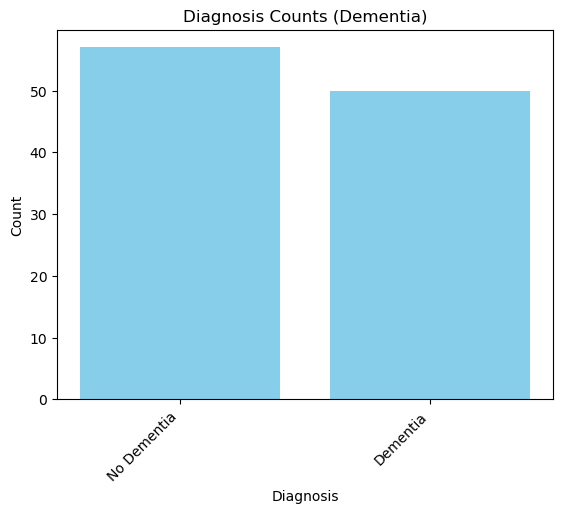

In [101]:
data = Donor_df.act_demented

# Count occurrences of each item
counter = Counter(data)

# Extract categories and counts
categories = list(counter.keys())
counts = list(counter.values())

# Create a bar chart
plt.bar(categories, counts, color='skyblue')

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts (Dementia)')

In [15]:
# Merge dataframes

# merged_fpkm_rnaseq_df = pd.merge(fpkm_unnnorm_T_df, RNASeq_select_df, on = 'rnaseq_profile_id')

#donor_df['act_demented']

donor_labels_df = Donor_df[['donor_id','act_demented']]

In [16]:
donor_labels_df

,donor_id,act_demented
0,326765665,No Dementia
1,326765656,No Dementia
2,326765654,Dementia
3,467056391,No Dementia
4,309335447,Dementia
...,...,...
102,309335458,Dementia
103,309335462,Dementia
104,309335454,No Dementia
105,309335486,No Dementia


In [17]:
# Merge dataframes
donor_labels_dict = donor_labels_df.set_index('donor_id')['act_demented'].to_dict()
protein_df['dementia_status'] = protein_df['donor_id'].map(donor_labels_dict)

In [18]:
protein_df

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,326765653,H14.09.066,10208,PCx,0.000046,0.001989,0.000533,0.000082,0.001130,0.003128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


In [19]:
total_nan_count = protein_df.isna().sum()


In [20]:
total_nan_count

donor_id                   0
donor_name                 0
structure_id               0
structure_acronym          0
ihc_a_syn                  0
ihc_tau2_ffpe             21
ihc_at8_ffpe              16
ihc_at8                    0
ihc_ptdp_43_ffpe          15
ihc_a_beta_ffpe           22
ihc_a_beta                 0
ihc_iba1_ffpe             14
ihc_gfap_ffpe             32
ptau_ng_per_mg            45
vegf_pg_per_mg            45
ab42_over_ab40_ratio      50
tnf_a_pg_per_mg           45
tau_ng_per_mg             51
il_10_pg_per_mg           45
isoprostane_pg_per_mg    239
il_6_pg_per_mg            45
il_1b_pg_per_mg           45
ptau_over_tau_ratio       51
il_4_pg_per_mg            45
rantes_pg_per_mg          45
ab40_pg_per_mg            45
a_syn_pg_per_mg           56
ifn_g_pg_per_mg           45
mcp_1_pg_per_mg           45
bdnf_pg_per_mg            54
mip_1a_pg_per_mg          45
il_7_pg_per_mg            45
ab42_pg_per_mg            45
dementia_status            0
dtype: int64

In [21]:
# Process dataframe
# - drop isoprostane_pg_per_mg because missing most of the data
# - dropna for remaining columns (will still represent 85% of the samples)

protein_df_cleaned = protein_df.drop('isoprostane_pg_per_mg',axis=1)
protein_df_cleaned.dropna(inplace = True)

In [22]:
total_nan_count = protein_df_cleaned.isna().sum()


In [23]:
total_nan_count

donor_id                0
donor_name              0
structure_id            0
structure_acronym       0
ihc_a_syn               0
ihc_tau2_ffpe           0
ihc_at8_ffpe            0
ihc_at8                 0
ihc_ptdp_43_ffpe        0
ihc_a_beta_ffpe         0
ihc_a_beta              0
ihc_iba1_ffpe           0
ihc_gfap_ffpe           0
ptau_ng_per_mg          0
vegf_pg_per_mg          0
ab42_over_ab40_ratio    0
tnf_a_pg_per_mg         0
tau_ng_per_mg           0
il_10_pg_per_mg         0
il_6_pg_per_mg          0
il_1b_pg_per_mg         0
ptau_over_tau_ratio     0
il_4_pg_per_mg          0
rantes_pg_per_mg        0
ab40_pg_per_mg          0
a_syn_pg_per_mg         0
ifn_g_pg_per_mg         0
mcp_1_pg_per_mg         0
bdnf_pg_per_mg          0
mip_1a_pg_per_mg        0
il_7_pg_per_mg          0
ab42_pg_per_mg          0
dementia_status         0
dtype: int64

In [24]:
protein_df_cleaned

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,326765668,H14.09.081,10294,HIP,0.000122,0.006376,0.026056,0.025917,0.001646,0.009597,...,4.56,5.170612,0.115779,0.00,3.50,11.53213,19.72,1.38,457.402238,No Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


In [25]:
# Proteins
# a_syn, tau2, at8, ptdp_43, a_beta, iba1, gfap, ptau, vegf, ab42/ab40 ratio, tnf_a, tau, il_10, isoprostane, il_6
# il_1b, p_tau/tau ratio, il_4, rantes, ab40, a_syn, ifn_g, mcp_1, bdnf, mip_1a, il_7, ab42

In [26]:
donor_labels_dict = donor_labels_df.set_index('donor_id')['act_demented'].to_dict()
protein_df_cleaned['dementia_status'] = protein_df_cleaned['donor_id'].map(donor_labels_dict)

In [27]:
protein_df_cleaned

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,326765668,H14.09.081,10294,HIP,0.000122,0.006376,0.026056,0.025917,0.001646,0.009597,...,4.56,5.170612,0.115779,0.00,3.50,11.53213,19.72,1.38,457.402238,No Dementia
373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,0.003483,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,0.001710,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,0.009795,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


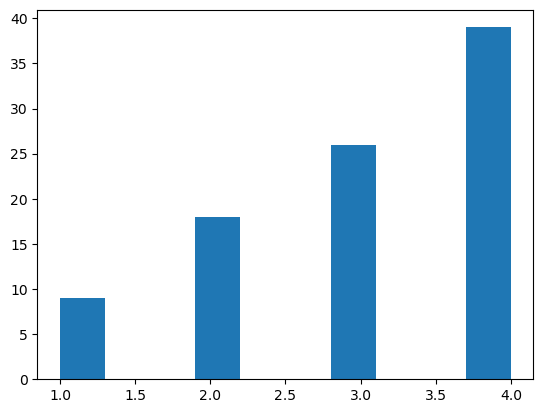

In [28]:
donor_ids_cleaned = protein_df_cleaned.donor_id.unique()
count_list = []
for donor in donor_ids_cleaned:
    count_list.append(len(protein_df_cleaned[protein_df_cleaned['donor_id']==donor]))

x = count_list

plt.hist(x)
plt.show() 

In [29]:
columns = protein_df_cleaned.columns

In [30]:
columns_keep = [
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg']

In [31]:
from sklearn.preprocessing import StandardScaler

x = protein_df_cleaned.loc[:,columns_keep].values
x = MinMaxScaler().fit_transform(x)

In [32]:
x.shape

(279, 28)

In [33]:
np.mean(x),np.std(x)

(0.16700139991204196, 0.21819012931448575)

In [34]:
feat_cols = columns_keep

In [35]:
normalised_protein = pd.DataFrame(x,columns=feat_cols)
normalised_protein


,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,ihc_a_beta,ihc_iba1_ffpe,ihc_gfap_ffpe,ptau_ng_per_mg,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,0.004851,0.070659,0.016041,0.000820,0.181651,0.098652,0.050317,0.140195,0.329684,0.079555,...,0.194485,0.047355,0.000641,0.040327,0.226852,0.079562,0.048526,0.011879,0.204941,0.816842
1,0.003883,0.085210,0.018517,0.001303,0.443239,0.050030,0.090170,0.295991,0.423883,0.043424,...,0.219158,0.071196,0.000573,0.036256,0.222222,0.154683,0.047726,0.010258,0.783229,0.127199
2,0.003968,0.110633,0.248443,0.142842,0.289009,0.084310,0.193490,0.333076,0.205040,0.237585,...,0.058055,0.384410,0.000641,0.028025,0.083333,0.179493,0.056716,0.034193,0.275226,0.734800
3,0.003007,0.095039,0.026515,0.001061,0.293991,0.035228,0.042059,0.276260,0.300421,0.165174,...,0.094340,0.044897,0.008942,0.013434,0.117284,0.039590,0.155861,0.010207,0.421364,0.887206
4,0.004955,0.060923,0.077627,0.000389,0.242403,0.209148,0.522897,0.251015,0.116882,0.260159,...,0.000000,0.053012,0.096314,0.003942,0.188272,0.081859,0.000097,0.013323,0.412665,0.685049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.007661,0.215311,0.473825,0.231140,0.274286,0.117303,0.100017,0.508987,0.275734,0.556902,...,0.000000,0.013505,0.005097,0.037760,0.000000,0.013401,0.111342,0.024973,0.024008,0.713989
275,0.005548,0.054834,0.081222,0.008080,0.163178,0.026916,0.112286,0.541738,0.397118,0.233870,...,0.000000,0.017592,0.000478,0.090210,0.000000,0.027414,0.028320,0.022567,0.024008,0.000073
276,0.004112,0.067683,0.111575,0.085165,0.214338,0.000694,0.071302,0.398251,0.309038,0.425571,...,0.000000,0.022567,0.000805,0.064463,0.000000,0.012022,0.101980,0.027810,0.010438,0.000271
277,0.050587,0.143587,0.018406,0.000667,0.479300,0.120231,0.231747,0.164625,0.428643,0.107656,...,0.001451,0.014452,0.000347,0.009936,0.000000,0.027567,0.027184,0.000000,0.216771,0.321375


In [36]:
from sklearn.decomposition import PCA
pca_protein = PCA(n_components=2)
principalComponents_protein = pca_protein.fit_transform(x)

In [37]:
principal_protein_Df = pd.DataFrame(data = principalComponents_protein
             , columns = ['principal component 1', 'principal component 2'])

In [38]:
principal_protein_Df

,principal component 1,principal component 2
0,-0.277439,-0.432517
1,-0.540190,0.105516
2,-0.001410,-0.450446
3,-0.263073,-0.319987
4,-0.209639,-0.326678
...,...,...
274,0.750148,0.217005
275,-0.059748,0.662670
276,0.183875,0.768230
277,-0.286655,-0.069320


In [39]:
print('Explained variation per principal component: {}'.format(pca_protein.explained_variance_ratio_))


Explained variation per principal component: [0.24518517 0.18902861]


In [40]:
def PCA_function(components, x):
    pca_protein = PCA(n_components=components)
    principalComponents_protein = pca_protein.fit_transform(x)
    print('Explained variation per principal component: {}'.format(pca_protein.explained_variance_ratio_))
    return None

In [41]:
PCA_function(3,x)

Explained variation per principal component: [0.24518517 0.18902861 0.0967961 ]


In [42]:
PCA_function(4,x)

Explained variation per principal component: [0.24518517 0.18902861 0.0967961  0.08270553]


In [43]:
protein_df_cleaned.reset_index(inplace = True)

In [44]:
protein_df_cleaned

,index,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,370,326765668,H14.09.081,10294,HIP,0.000122,0.006376,0.026056,0.025917,0.001646,...,4.56,5.170612,0.115779,0.00,3.50,11.53213,19.72,1.38,457.402238,No Dementia
275,373,309335452,H14.09.015,10294,HIP,0.000089,0.001918,0.004685,0.000923,0.001181,...,5.94,0.574500,0.248816,0.00,7.16,2.94819,17.82,1.38,0.054413,No Dementia
276,374,309335489,H14.09.052,10294,HIP,0.000066,0.002275,0.006337,0.009560,0.001395,...,7.62,0.900050,0.183510,0.00,3.14,10.56419,21.96,0.60,0.181375,No Dementia
277,375,309335458,H14.09.021,10208,PCx,0.000793,0.004384,0.001266,0.000093,0.002505,...,4.88,0.444250,0.045202,0.00,7.20,2.83064,0.00,12.46,205.886650,Dementia


In [45]:
print(len(protein_df_cleaned[protein_df_cleaned['dementia_status']=='No Dementia']))
print(len(protein_df_cleaned[protein_df_cleaned['dementia_status']=='Dementia']))

144
135


<Figure size 640x480 with 0 Axes>

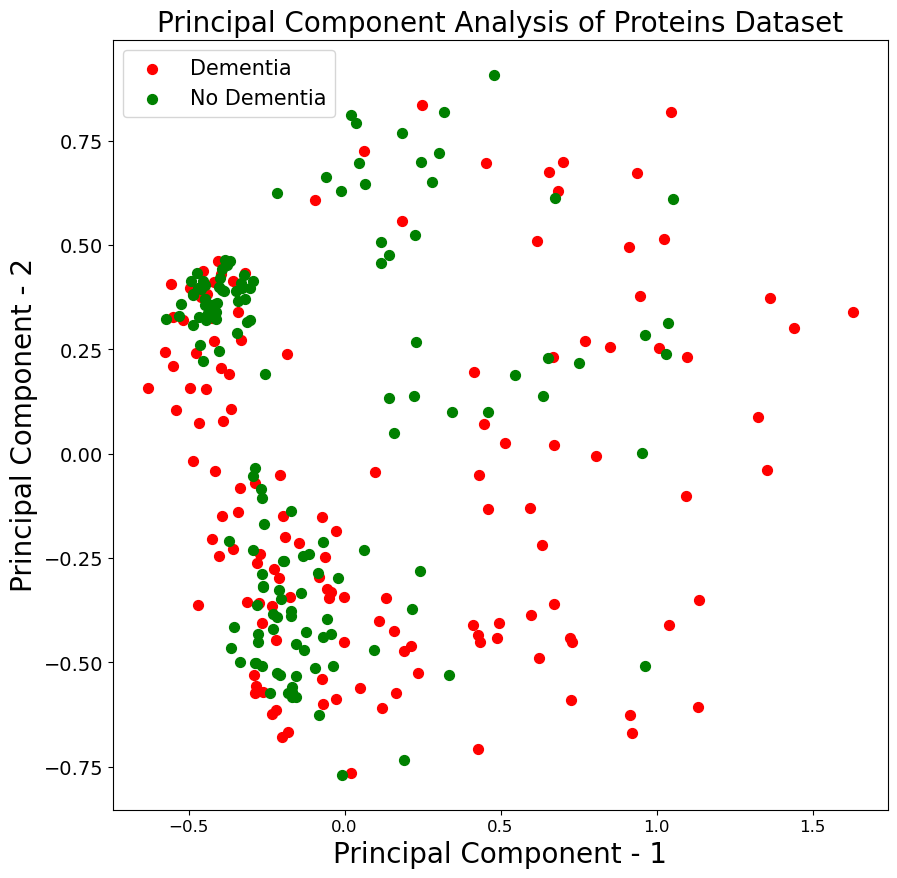

In [46]:

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Proteins Dataset",fontsize=20)
targets = ['Dementia', 'No Dementia']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    #print(target)
    indicesToKeep = protein_df_cleaned['dementia_status'] == target
    #print(indicesToKeep)
    plt.scatter(principal_protein_Df.loc[indicesToKeep, 'principal component 1']
               , principal_protein_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# Predictive Modeling


In [47]:

# Define X and y 

X_pca = principal_protein_Df
#print(X)
y = protein_df_cleaned['dementia_status']

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier().fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Score with PCA: ", score)

Score with PCA:  0.5892857142857143


In [48]:
X = normalised_protein
#print(X)
y = protein_df_cleaned['dementia_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier().fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Score without PCA: ", score)


Score without PCA:  0.6428571428571429


In [49]:
def Kfold_validation(k, X, y, model_algorithm):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    model = model_algorithm

    # Perform k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=kf)

    # Print the cross-validation scores
    print("Cross-validation scores:", scores)

    # Print the mean and standard deviation of the scores
    print(f"Mean accuracy: {scores.mean():.2f}")
    print(f"Standard deviation: {scores.std():.2f}")
    return None

In [50]:
k=5
Kfold_validation(k, X_pca, y, DecisionTreeClassifier())

Cross-validation scores: [0.64285714 0.57142857 0.57142857 0.5        0.6       ]
Mean accuracy: 0.58
Standard deviation: 0.05


In [51]:
Kfold_validation(k, X, y, DecisionTreeClassifier())

Cross-validation scores: [0.625      0.60714286 0.64285714 0.53571429 0.6       ]
Mean accuracy: 0.60
Standard deviation: 0.04


In [52]:
Kfold_validation(k, X, y, RandomForestClassifier())

Cross-validation scores: [0.625      0.67857143 0.67857143 0.55357143 0.78181818]
Mean accuracy: 0.66
Standard deviation: 0.07


In [53]:
Kfold_validation(k, X, y, LogisticRegression())

Cross-validation scores: [0.64285714 0.73214286 0.625      0.57142857 0.69090909]
Mean accuracy: 0.65
Standard deviation: 0.06


In [54]:
Kfold_validation(k, X, y, LinearDiscriminantAnalysis())

Cross-validation scores: [0.71428571 0.67857143 0.67857143 0.53571429 0.63636364]
Mean accuracy: 0.65
Standard deviation: 0.06


In [55]:
Kfold_validation(k, X, y, GaussianNB())

Cross-validation scores: [0.67857143 0.625      0.625      0.57142857 0.65454545]
Mean accuracy: 0.63
Standard deviation: 0.04


In [56]:
Kfold_validation(k, X, y, SVC())

Cross-validation scores: [0.64285714 0.73214286 0.60714286 0.625      0.72727273]
Mean accuracy: 0.67
Standard deviation: 0.05


In [57]:
len(X_train.columns)

28

# Recursive Feature Selection

In [58]:
def Kfold_validation(k, X, y, model_algorithm):
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    model = model_algorithm

    # Perform k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=kf)

    # Print the cross-validation scores
    print("Cross-validation scores:", scores)

    # Print the mean and standard deviation of the scores
    print(f"Mean accuracy: {scores.mean():.2f}")
    print(f"Standard deviation: {scores.std():.2f}")
    return None

In [59]:
def recursive_feature_elimination(estimator, num_features, X_train, y_train, output_print=False):
    selected_features = []
    accuracy = None
    rfe = RFE(estimator=estimator, n_features_to_select=num_features) 
    rfe.fit(X_train, y_train)
    features_TF = list(rfe.support_)
    features_name = list(X_train.columns)
    selected = zip(features_TF, features_name)
    selected_features = [y for x, y in selected if x == True]
    
    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)
    clf.fit(X_train_selected, y_train)
    accuracy = clf.score(X_test_selected, y_test)

    if output_print == True:
        print('Estimator: ', estimator)
        print('Num of features: ',num_features)
        print('Accuracy Score: ', accuracy)
        print('Selected Features: ', selected_features)
        return None
    else:
        return accuracy,selected_features

In [60]:
accuracy = recursive_feature_elimination(RandomForestClassifier(), 7, X_train,y_train)[0]

In [61]:
accuracy

0.5535714285714286

In [62]:
#recursive_feature_elimination(DecisionTreeClassifier(), 7, X_train,y_train)

In [63]:
#recursive_feature_elimination(LogisticRegression(), 7, X_train,y_train)

In [64]:
#recursive_feature_elimination(LogisticRegression(), 5, X_train,y_train)

In [65]:
#recursive_feature_elimination(LogisticRegression(), 10, X_train,y_train)

In [66]:
#recursive_feature_elimination(LogisticRegression(), 15, X_train,y_train)

In [67]:
#recursive_feature_elimination(LogisticRegression(), 8, X_train,y_train)

In [68]:
def graph_accuracy(num_features_range, estimator, X_train,y_train): #num_features_range [start,stop]
    x = range(num_features_range[0],num_features_range[1]+1)
    y = []
    score_feature_lst = []
    
    for i in x:
        y.append(recursive_feature_elimination(estimator, i, X_train,y_train)[0])
        score_feature_lst.append(recursive_feature_elimination(estimator, i, X_train,y_train))
        
    
    plt.figure()
    plt.figure(figsize=(10,10))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('Number of Features',fontsize=20)
    plt.ylabel('Accuracy Score',fontsize=20)
    plt.title("Accuracy Score by Number of Features",fontsize=20)

    plt.plot(x, y)
    
    score_feature_lst.sort(reverse=True)
    print('Top 2 Accuracy Scores and Features')
    print(score_feature_lst[0][0])
    print('Number of features: ', len(score_feature_lst[0][1]))
    print(score_feature_lst[0][1])
    print()
    print(score_feature_lst[1][0])
    print('Number of features: ', len(score_feature_lst[1][1]))
    print(score_feature_lst[1][1])
    
    return None

    

Top 2 Accuracy Scores and Features
0.6964285714285714
Number of features:  25
['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg', 'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']

0.6964285714285714
Number of features:  11
['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ab42_over_ab40_ratio', 'tau_ng_per_mg', 'mcp_1_pg_per_mg', 'il_7_pg_per_mg']


<Figure size 640x480 with 0 Axes>

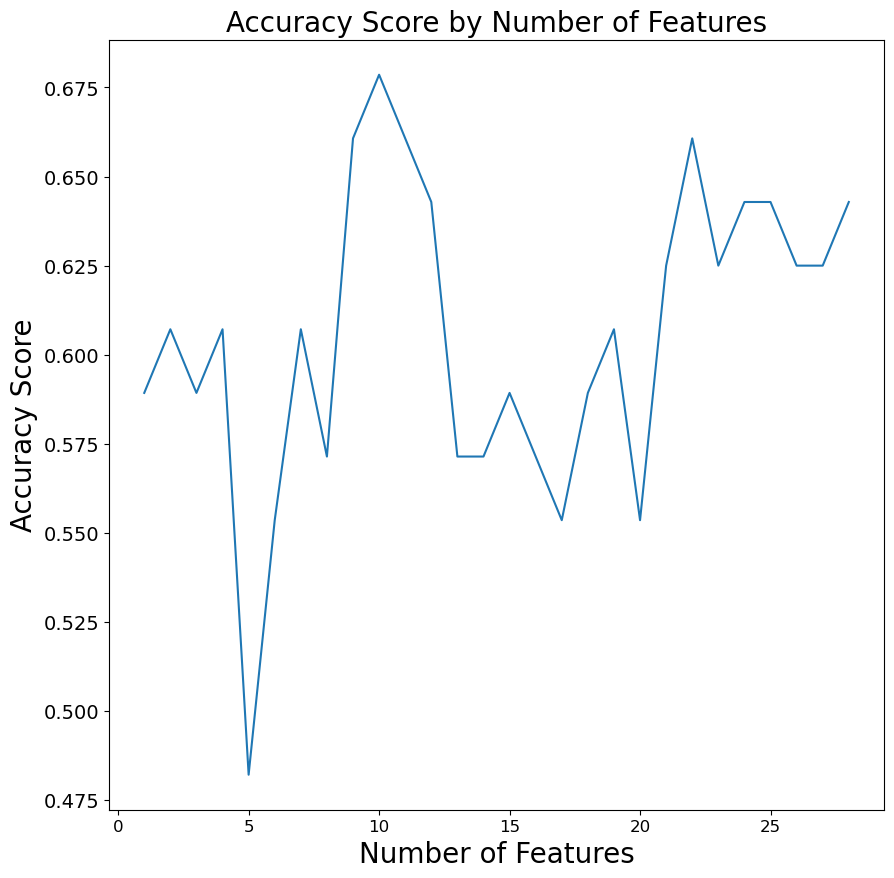

In [69]:
graph_accuracy([1,28], LogisticRegression(), X_train,y_train) #num_features_range [start,stop]


Top 2 Accuracy Scores and Features
0.6964285714285714
Number of features:  13
['ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_a_beta_ffpe', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'tau_ng_per_mg', 'ptau_over_tau_ratio', 'rantes_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'ab42_pg_per_mg']

0.6964285714285714
Number of features:  15
['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_a_beta_ffpe', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'tau_ng_per_mg', 'ptau_over_tau_ratio', 'rantes_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']


<Figure size 640x480 with 0 Axes>

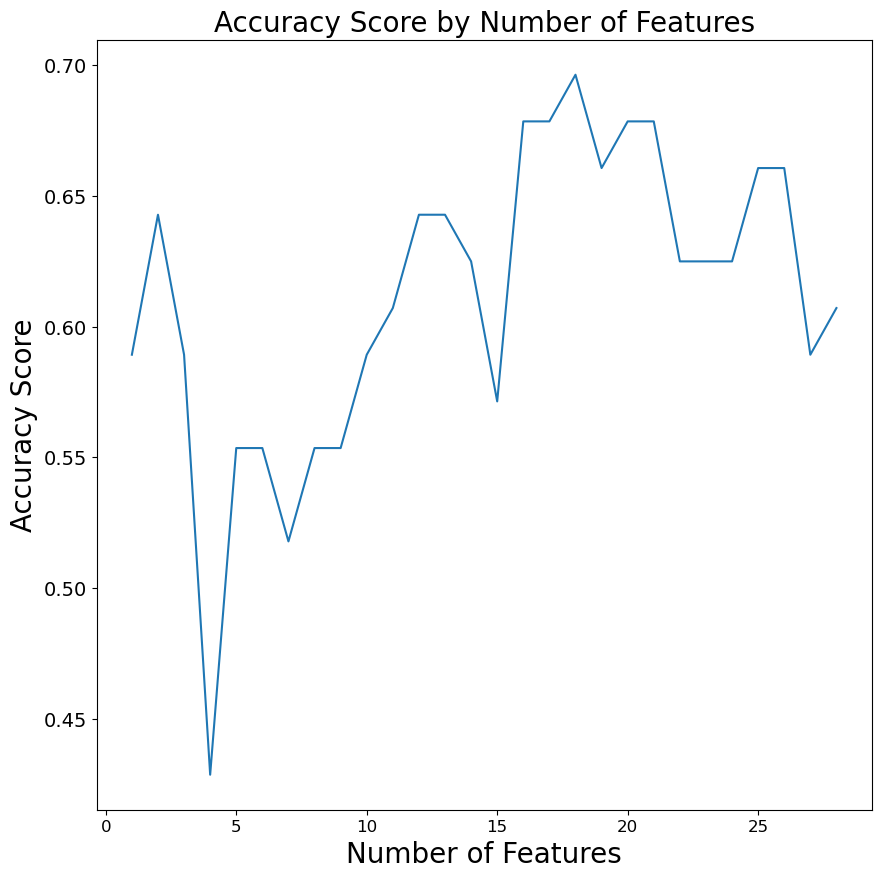

In [70]:
graph_accuracy([1,28], RandomForestClassifier(), X_train,y_train) #num_features_range [start,stop]


Top 2 Accuracy Scores and Features
0.6964285714285714
Number of features:  28
['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg', 'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg', 'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']

0.6785714285714286
Number of features:  21
['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'il_1b_pg_per_mg', 'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_

<Figure size 640x480 with 0 Axes>

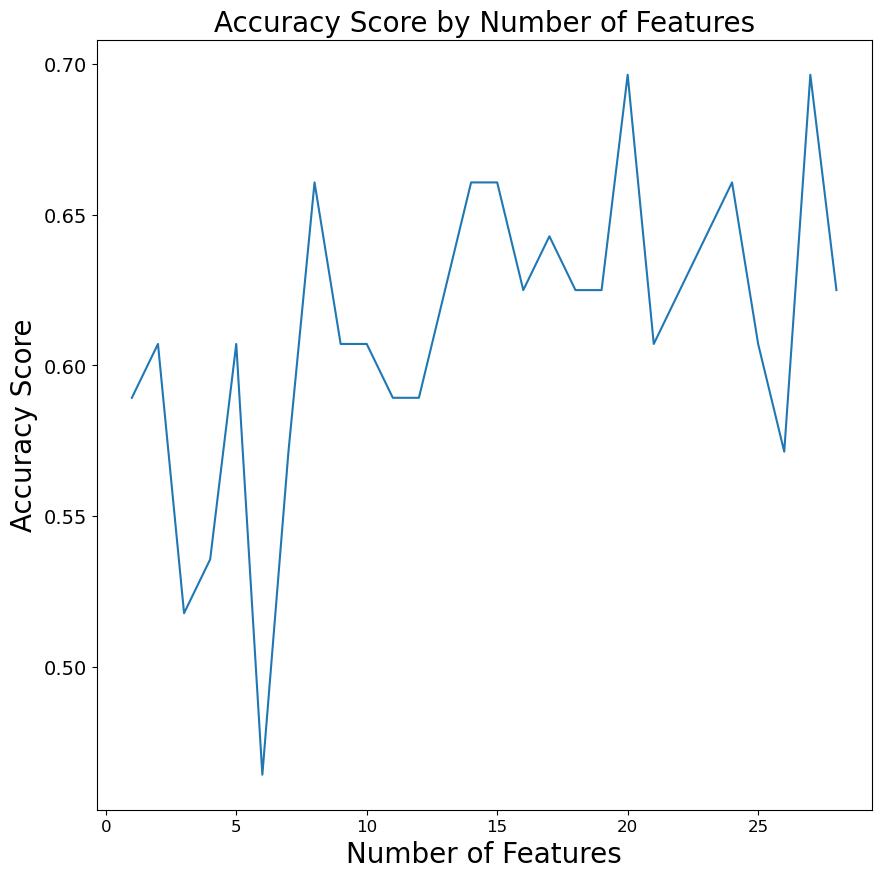

In [71]:
graph_accuracy([1,28], DecisionTreeClassifier(), X_train,y_train) #num_features_range [start,stop]


# K FOLD VALIDATION


In [72]:
def Kfold_validation(k, X, y, model_algorithm):
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    model = model_algorithm

    # Perform k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=kf)

    # Print the cross-validation scores
    print("Cross-validation scores:", scores)

    # Print the mean and standard deviation of the scores
    print(f"Mean accuracy: {scores.mean():.2f}")
    print(f"Standard deviation: {scores.std():.2f}")
    return None

In [73]:
X = X[['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 
      'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 
      'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'il_1b_pg_per_mg', 
      'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 
      'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 
      'ab42_pg_per_mg']]


In [74]:
Kfold_validation(5,X,y,DecisionTreeClassifier())

Cross-validation scores: [0.58928571 0.66071429 0.55357143 0.5        0.63636364]
Mean accuracy: 0.59
Standard deviation: 0.06


In [75]:
Kfold_validation(5,X,y,DecisionTreeClassifier())

Cross-validation scores: [0.625      0.57142857 0.57142857 0.51785714 0.63636364]
Mean accuracy: 0.58
Standard deviation: 0.04


# RFE with Cross Validation

In [76]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 11


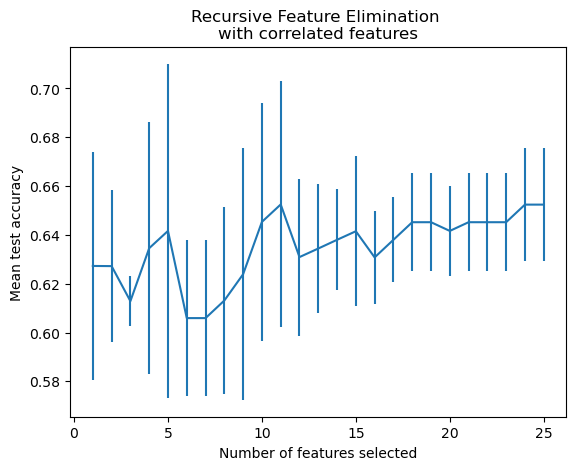

In [77]:
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [78]:


rfecv = RFECV(
    estimator=RandomForestClassifier(),
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 25


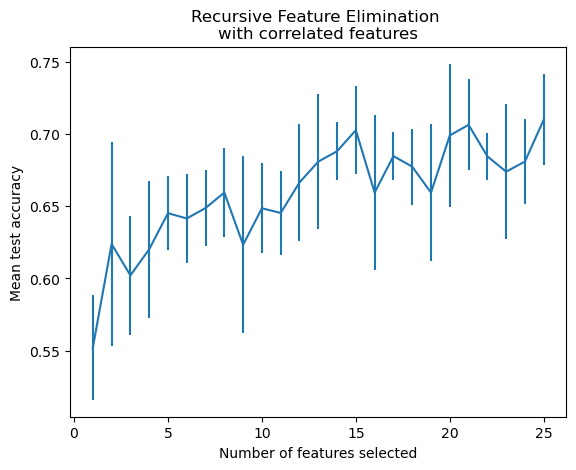

In [79]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [80]:
rfecv = RFECV(
    estimator=DecisionTreeClassifier(),
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)
print(f"Optimal number of features: {rfecv.n_features_}")

features_TF = list(rfecv.support_)
features_name = list(X.columns)
selected = zip(features_TF, features_name)
selected_features = [y for x, y in selected if x == True]

print('Selected features: ', selected_features)

Optimal number of features: 5
Selected features:  ['ihc_at8', 'il_6_pg_per_mg', 'rantes_pg_per_mg', 'a_syn_pg_per_mg', 'ab42_pg_per_mg']


In [81]:
models_list = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), 
            LinearDiscriminantAnalysis()]

In [82]:
def RFE_CV(estimator, X,y, step=1, cv= StratifiedKFold(5), scoring='accuracy', min_features_to_select=1, n_jobs=2):
    rfecv = RFECV(
    estimator=estimator,
    step=1,
    cv=cv,
    scoring=scoring,
    min_features_to_select=min_features_to_select,
    n_jobs=n_jobs,)
    
    rfecv.fit(X, y)
    features_TF = list(rfecv.support_)
    features_name = list(X.columns)
    selected = zip(features_TF, features_name)
    selected_features = [y for x, y in selected if x == True]
    
    n_scores = len(rfecv.cv_results_["mean_test_score"])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test accuracy")
    plt.errorbar(
        range(min_features_to_select, n_scores + min_features_to_select),
        rfecv.cv_results_["mean_test_score"],
        yerr=rfecv.cv_results_["std_test_score"],
    )
    plt.title("Recursive Feature Elimination \nwith correlated features")
    plt.show()
    
    print(estimator)
    print(f"Optimal number of features: {rfecv.n_features_}")
    print('Highest mean accuracy score: ', max(rfecv.cv_results_["mean_test_score"]))
    print('Selected features: ', selected_features)
    
    return None

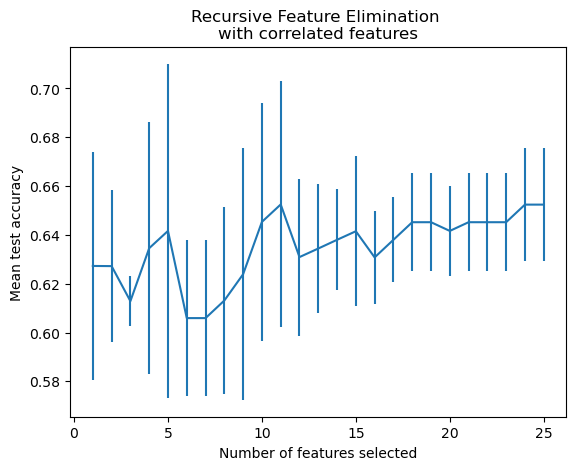

LogisticRegression()
Optimal number of features: 11
Highest mean accuracy score:  0.6524675324675325
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ab42_over_ab40_ratio', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'il_7_pg_per_mg']


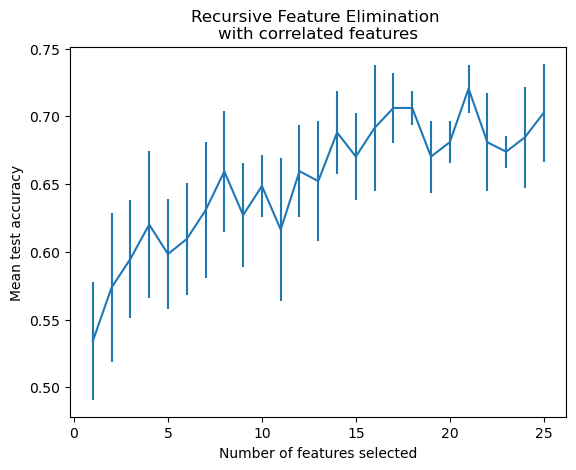

RandomForestClassifier()
Optimal number of features: 21
Highest mean accuracy score:  0.7204545454545455
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'ptau_over_tau_ratio', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']


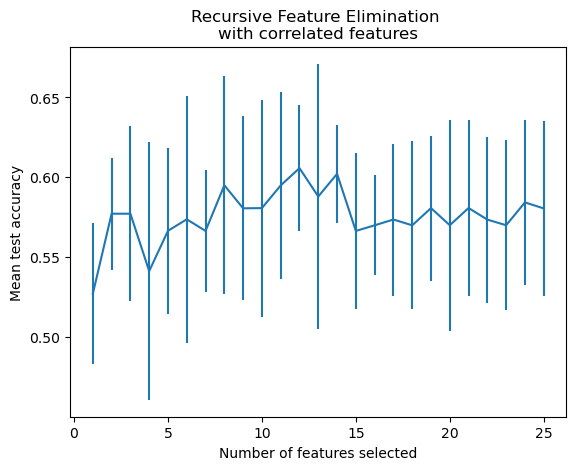

DecisionTreeClassifier()
Optimal number of features: 12
Highest mean accuracy score:  0.6057142857142856
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8', 'ihc_iba1_ffpe', 'ptau_ng_per_mg', 'il_6_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'mip_1a_pg_per_mg', 'ab42_pg_per_mg']


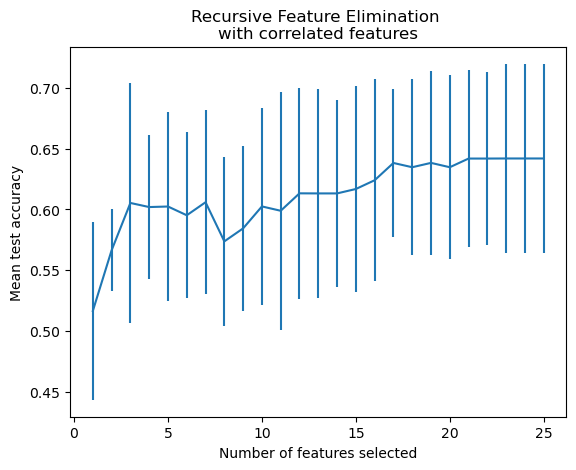

LinearDiscriminantAnalysis()
Optimal number of features: 23
Highest mean accuracy score:  0.641948051948052
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']


In [83]:
for model in models_list:
    RFE_CV(estimator=model,X=X,y=y)

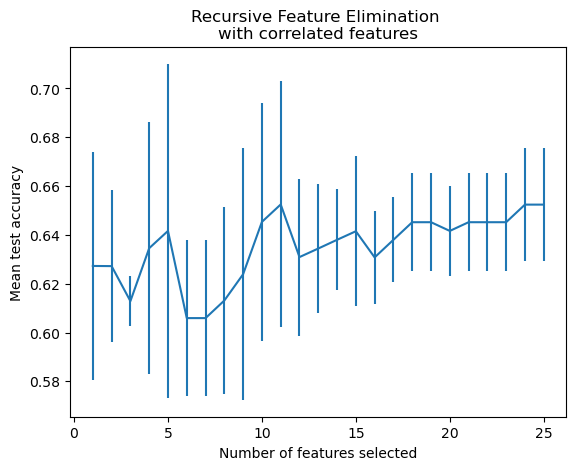

LogisticRegression()
Optimal number of features: 11
Highest mean accuracy score:  0.6524675324675325
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ab42_over_ab40_ratio', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'il_7_pg_per_mg']


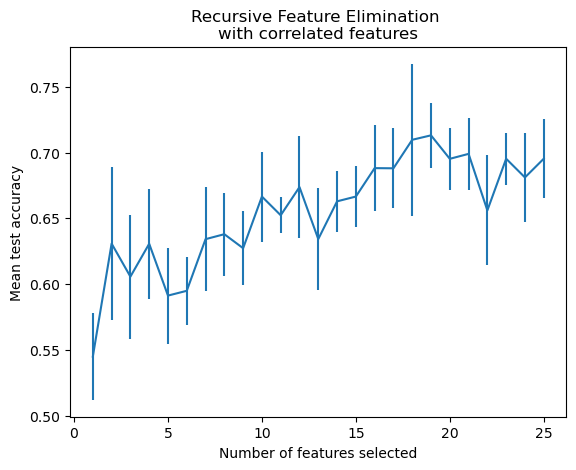

RandomForestClassifier()
Optimal number of features: 19
Highest mean accuracy score:  0.7131168831168833
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'ptau_over_tau_ratio', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']


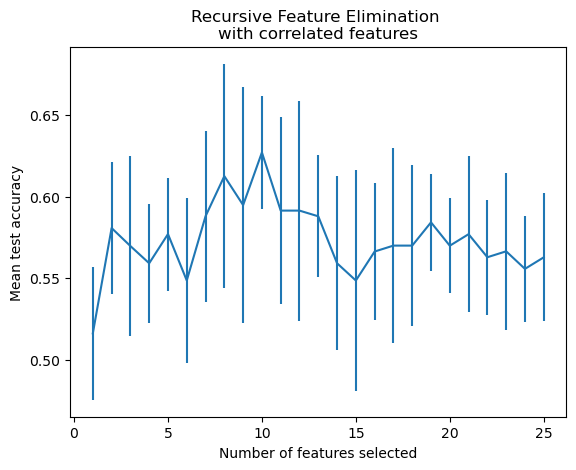

DecisionTreeClassifier()
Optimal number of features: 10
Highest mean accuracy score:  0.6272077922077922
Selected features:  ['ihc_a_syn', 'ihc_at8', 'ihc_gfap_ffpe', 'il_6_pg_per_mg', 'rantes_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'ab42_pg_per_mg']


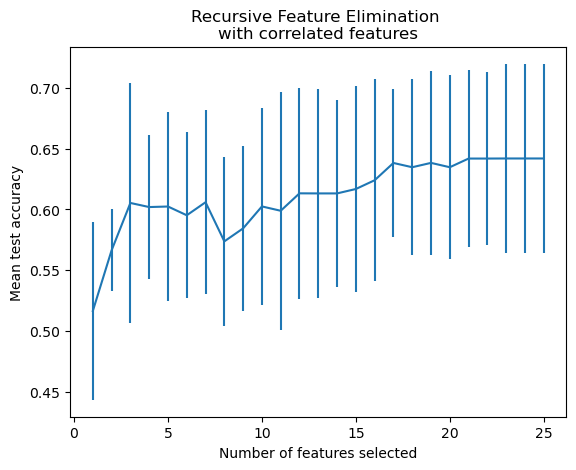

LinearDiscriminantAnalysis()
Optimal number of features: 23
Highest mean accuracy score:  0.641948051948052
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']


In [84]:
for model in models_list:
    RFE_CV(estimator=model,X=X,y=y)

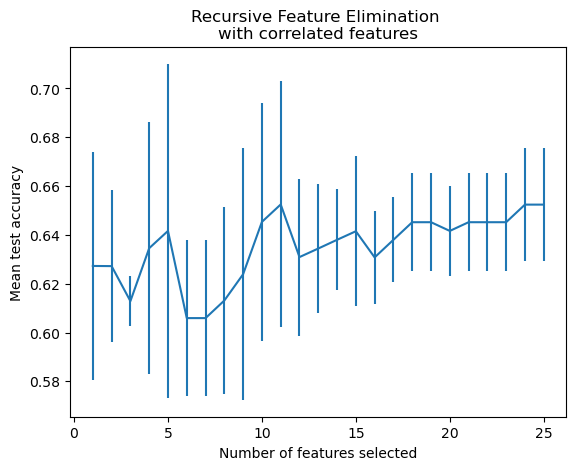

LogisticRegression()
Optimal number of features: 11
Highest mean accuracy score:  0.6524675324675325
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ab42_over_ab40_ratio', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'il_7_pg_per_mg']


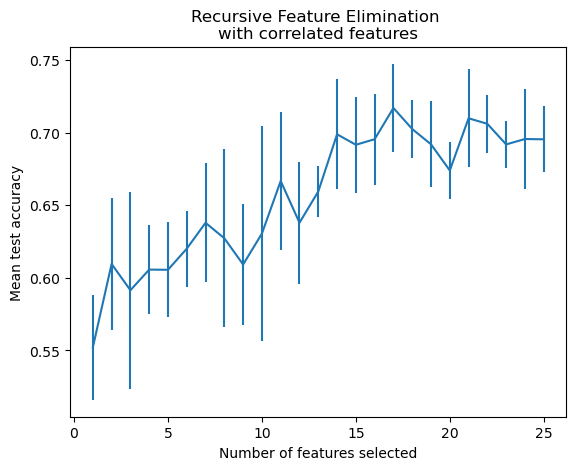

RandomForestClassifier()
Optimal number of features: 17
Highest mean accuracy score:  0.716883116883117
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'ptau_over_tau_ratio', 'rantes_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']


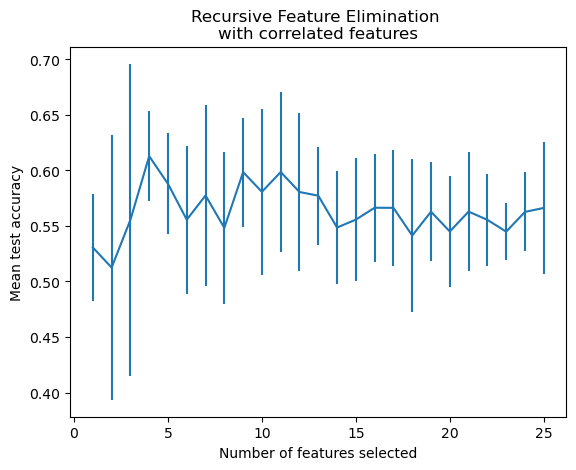

DecisionTreeClassifier()
Optimal number of features: 4
Highest mean accuracy score:  0.6128571428571428
Selected features:  ['ihc_at8', 'il_6_pg_per_mg', 'rantes_pg_per_mg', 'ab42_pg_per_mg']


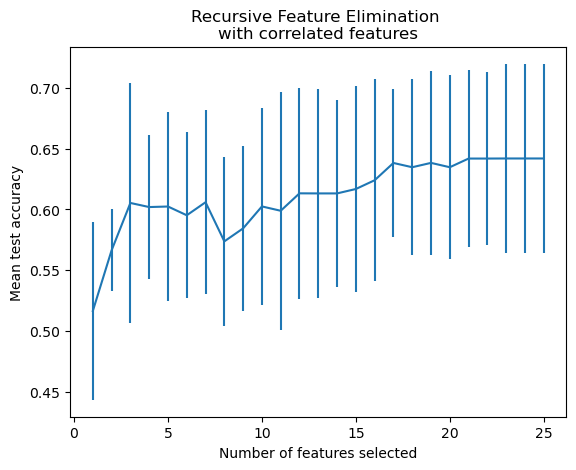

LinearDiscriminantAnalysis()
Optimal number of features: 23
Highest mean accuracy score:  0.641948051948052
Selected features:  ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']


In [85]:
for model in models_list:
    RFE_CV(estimator=model,X=X,y=y)

In [86]:
selected_features_1 = ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 
                       'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'ab42_over_ab40_ratio', 
                       'il_6_pg_per_mg', 'ptau_over_tau_ratio', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 
                       'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 
                       'ab42_pg_per_mg']

selected_features_2 = ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 
                       'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 
                       'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'ptau_over_tau_ratio', 
                       'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg', 
                       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']

selected_features_3 = ['ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8', 'ihc_ptdp_43_ffpe', 
                       'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 
                       'vegf_pg_per_mg', 'ab42_over_ab40_ratio', 'il_6_pg_per_mg', 'ptau_over_tau_ratio', 
                       'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'mcp_1_pg_per_mg', 
                       'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg']

common_features = set(selected_features_1) & set(selected_features_2) & set(selected_features_3)

print(list(common_features))
print(len(list(common_features)))

['ihc_a_beta_ffpe', 'ptau_ng_per_mg', 'il_7_pg_per_mg', 'ihc_gfap_ffpe', 'rantes_pg_per_mg', 'ab42_pg_per_mg', 'mip_1a_pg_per_mg', 'ab42_over_ab40_ratio', 'ihc_tau2_ffpe', 'il_6_pg_per_mg', 'a_syn_pg_per_mg', 'ihc_ptdp_43_ffpe', 'ihc_a_syn', 'mcp_1_pg_per_mg', 'ptau_over_tau_ratio', 'ihc_at8_ffpe', 'ihc_a_beta', 'ihc_at8', 'ab40_pg_per_mg']
19


In [87]:
x_features = ['mcp_1_pg_per_mg', 'ihc_at8', 'il_6_pg_per_mg', 'rantes_pg_per_mg', 
             'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ihc_ptdp_43_ffpe', 'ihc_at8_ffpe', 
             'ptau_ng_per_mg', 'ihc_gfap_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ab42_pg_per_mg', 
             'a_syn_pg_per_mg', 'ptau_over_tau_ratio', 'ab42_over_ab40_ratio', 'ab40_pg_per_mg', 'ihc_tau2_ffpe', 
             'ihc_a_syn']

X = normalised_protein[x_features]
#print(X)
y = protein_df_cleaned['dementia_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier().fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Score: ", score)


Score:  0.6785714285714286


In [88]:
# Ensembles

In [89]:
from sklearn.ensemble import HistGradientBoostingClassifier
X = protein_df[columns_keep] #use all features
y = protein_df['dementia_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.631578947368421

In [90]:
X = protein_df[x_features] #Using features from RFECV
y = protein_df['dementia_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.631578947368421

# Use Custom Train Test Validate Split

In [91]:
np.random.seed(42)
train_ids = np.random.choice(donor_ids, int(np.ceil(len(donor_ids) * 0.7)))
test_ids = np.setdiff1d(donor_ids_cleaned, train_ids)
validate_ids = np.random.choice(test_ids, int(np.ceil(len(test_ids) * 0.5)))
test_ids = np.setdiff1d(test_ids, validate_ids)
len(train_ids), len(test_ids), len(validate_ids)

(75, 25, 22)

In [92]:
drop_columns = ['donor_id','donor_name','structure_id','structure_acronym']
train_df = protein_df[protein_df['donor_id'].isin(train_ids)].drop(columns = drop_columns)
val_df = protein_df[protein_df['donor_id'].isin(validate_ids)].drop(columns = drop_columns)
test_df = protein_df[protein_df['donor_id'].isin(test_ids)].drop(columns = drop_columns)

In [93]:
X_train = train_df[x_features] #Using features from RFECV
y_train = train_df['dementia_status']

X_test = test_df[x_features]
y_test = test_df['dementia_status']

clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
clf.score(X_test, y_test)

0.59375

# Qualitative Analysis of Protains

In [ ]:
Stains_df

# Use One Hot Encoder for inclusion of Categorical Variables

# Add in Gene Expression Data

# Explore Correlations

In [ ]:
# Examine gene expressions to protein measurements for correlations 